In [11]:
import pandas as pd
import numpy as np

In [12]:
import sys
import os

ROOT_DIR = "../../"
sys.path.insert(0, os.path.abspath(ROOT_DIR + "/src"))
import visualization.visualization as vs
import scraping.preprocessing as pr

In [13]:
vs.init_plot_settings()

<Figure size 1440x720 with 0 Axes>

# Load all data

In [14]:
# Load system requirements data
sysreqs = pd.read_csv(ROOT_DIR + "data/sys_reqs/1-19-2021.sys_reqs.csv")
# Load cpu hardware specs data
cpus = pd.read_csv(ROOT_DIR + "data/Intel_CPUs.csv")
cpus = cpus.dropna(subset=["Processor_Number"])
# Preprocess the system reqs data
sysreq_df = pr.preprocess_data(sysreqs, cpus)
# Load spydf data
spydf = pd.read_csv(ROOT_DIR + "data/steamspy.csv")

c:\users\kutor\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (24,34,38,40,41,43,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,97,98,100,101,102,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\STORAGE\Projects\GitHub\steam-games\src

# Prep then merge data on app id

In [15]:
app_ids = sysreq_df.href.str.extract(r"[app|bundle]/(\d+)/")[0]
app_ids = app_ids.fillna(-1).astype(int)
sysreq_df["app_id"] = app_ids

c:\users\kutor\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
spydf = spydf.rename({"appid": "app_id"}, axis=1)

In [17]:
df = sysreq_df.merge(spydf[spydf["app_id"].notna()], on="app_id", suffixes=[None, "_steamspy"])

# Analyze missingness

In [18]:
import matplotlib.pyplot as plt

negative            0.000000
ccu                 0.000000
median_2weeks       0.000000
median_forever      0.000000
average_2weeks      0.000000
average_forever     0.000000
owners              0.000000
userscore           0.000000
positive            0.000000
tags                0.000000
app_id              0.000000
href                0.000000
name                0.010603
name_steamspy       0.023563
discount            0.067154
initialprice        0.067154
price               0.067154
developer           0.911886
languages           2.073540
genre               2.107706
release_date        5.795309
publisher          11.703719
min_memory         13.473297
min_storage        20.037936
min_graphics       20.182849
min_processor      27.021996
score_rank         99.892789
dtype: float64

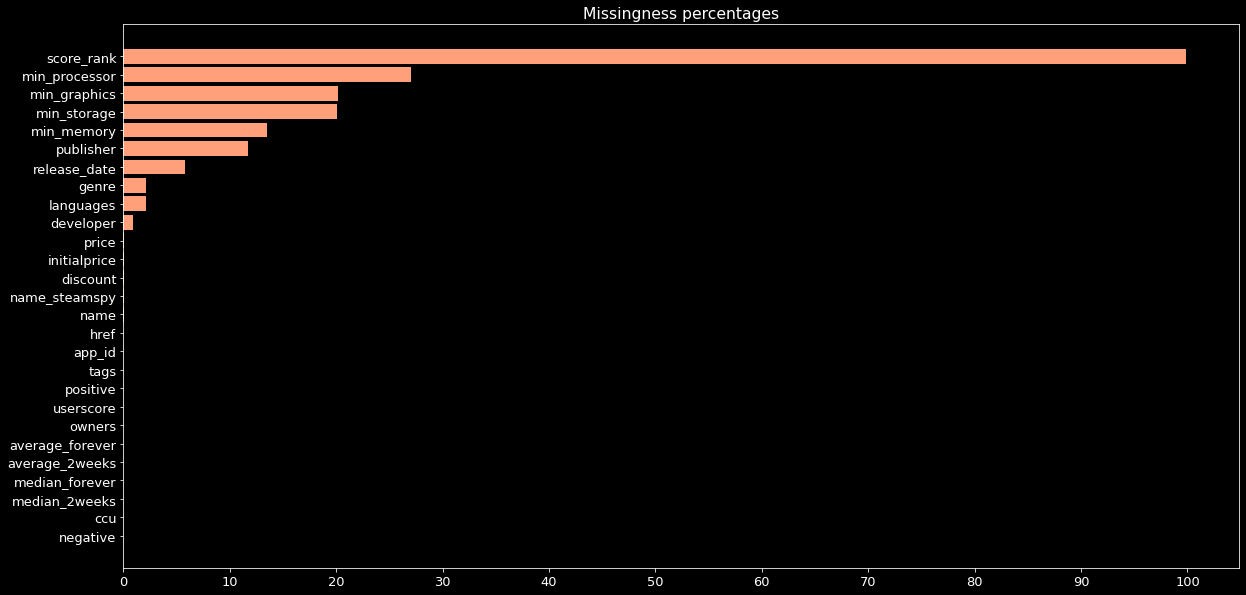

In [19]:
na_vals = df.isna().sum().sort_values() / df.shape[0] * 100
display(na_vals)
plt.barh(na_vals.index, na_vals, color="lightsalmon")
plt.title("Missingness percentages")
plt.xticks(np.linspace(0, 100, 11))
plt.show()

# Analyze steamspy specific keys

In [20]:
subdf = df[spydf.keys()]

In [21]:
subdf.head()

,app_id,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,languages,genre,tags
0,252490,Rust,Facepunch Studios,Facepunch Studios,NaN,471943.0,80189.0,0.0,"20,000,000 .. 50,000,000",20706.0,2344.0,2351.0,938.0,3999.0,3999.0,0.0,161905.0,"English, French, Italian, German, Spanish - Sp...","Action, Adventure, Indie, Massively Multiplaye...","{'Survival': 15182, 'Crafting': 9572, 'Multipl..."
1,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,NaN,4614042.0,623301.0,0.0,"50,000,000 .. 100,000,000",29537.0,1058.0,7959.0,452.0,0.0,0.0,0.0,985511.0,"Czech, Danish, Dutch, English, Finnish, French...","Action, Free to Play","{'FPS': 85744, 'Shooter': 61366, 'Multiplayer'..."
2,1172470,Apex Legends™,Respawn Entertainment,Electronic Arts,NaN,110902.0,8192.0,0.0,"10,000,000 .. 20,000,000",1578.0,614.0,305.0,225.0,0.0,0.0,0.0,81433.0,"English, French, Italian, German, Spanish - Sp...","Action, Adventure, Free to Play","{'Free to Play': 464, 'Battle Royale': 428, 'S..."
3,1085660,Destiny 2,Bungie,Bungie,NaN,285881.0,46670.0,0.0,"10,000,000 .. 20,000,000",4405.0,1129.0,352.0,647.0,0.0,0.0,0.0,45531.0,"English, French, Italian, German, Spanish - Sp...","Action, Adventure, Free to Play","{'PvP': 1985, 'PvE': 1953, 'Open World': 1933,..."
4,739630,Phasmophobia,Kinetic Games,Kinetic Games,NaN,216299.0,5426.0,0.0,"5,000,000 .. 10,000,000",964.0,207.0,453.0,109.0,1399.0,1399.0,0.0,21130.0,"English, Portuguese, Spanish - Spain, Portugue...","Action, Indie, Early Access","{'Horror': 914, 'Online Co-Op': 593, 'Multipla..."


## Analyze ownership

In [22]:
def convert_owners(col):
    def conv_nums(nums):
        out = []
        for num in nums:
            out.append(int(num.replace(',', '')))
        return out

    elems = col.str.split(" .. ")
    num_col = elems.apply(conv_nums)
    
    return num_col

In [23]:
# Convert the owners column from string data to numerical data
subdf["owners"] = convert_owners(subdf["owners"])
# Extract out the minimum and max values
subdf["owners_min"] = subdf["owners"].apply(lambda row:row[0])
subdf["owners_max"] = subdf["owners"].apply(lambda row:row[1])

c:\users\kutor\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kutor\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\kutor\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

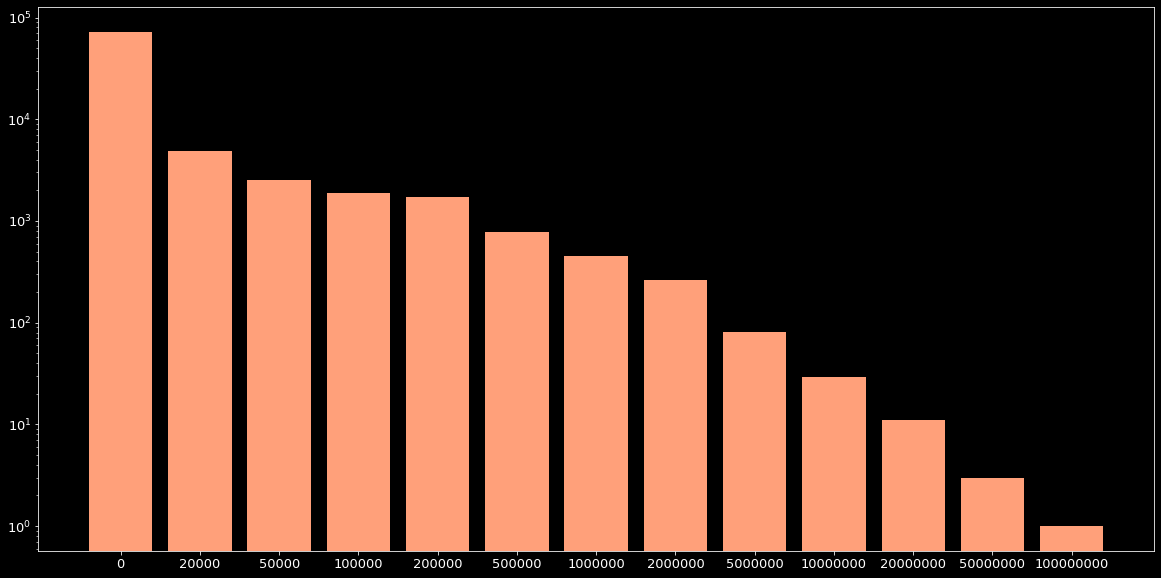

In [24]:
min_owners = subdf["owners_min"].value_counts()
plt.bar(x=min_owners.index.astype(str), height=min_owners.values, color="lightsalmon")
plt.yscale("log")
plt.show()

## Top 200 most popular game analysis

In [25]:
# Get the 200 most popular games ever
pop_games = df.loc[subdf["owners_min"].sort_values(ascending=False)[:200].index]

### Release date distribution

findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


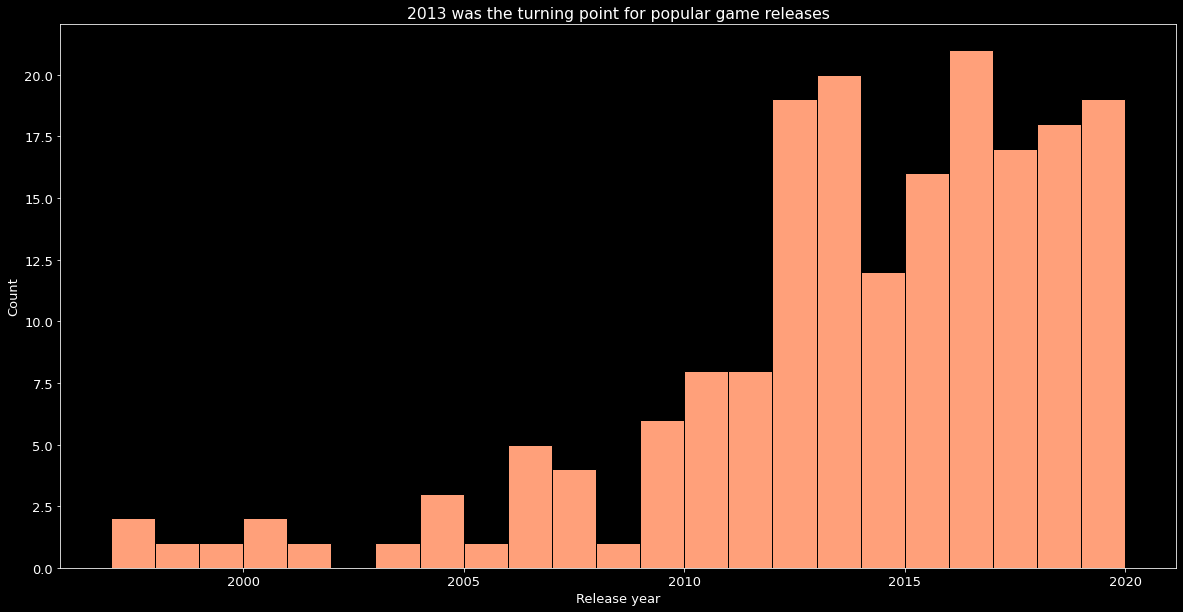

In [26]:
# Release date of most popular games
pop_years = pop_games.release_date.dt.year
plt.hist(pop_years, color="lightsalmon", edgecolor="black", bins=int(max(pop_years) - min(pop_years)))
plt.title("2013 was the turning point for popular game releases")
plt.xlabel("Release year")
plt.ylabel("Count")
plt.show()

### Progression of minimum processor requirements

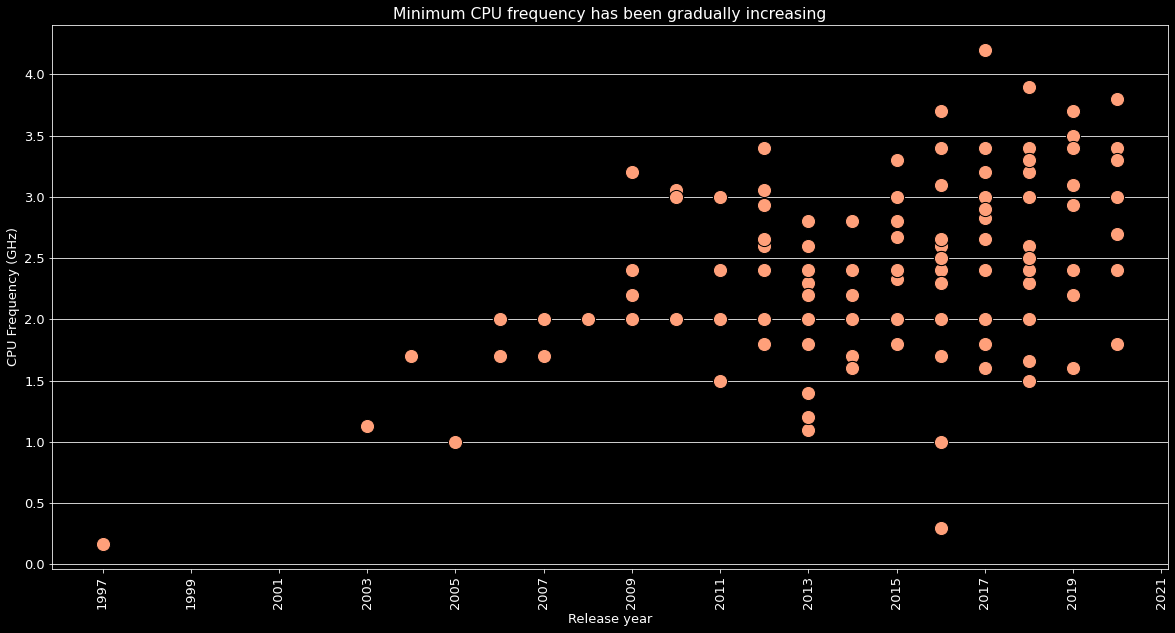

In [33]:
step = 2
year_range = np.arange(pop_years.min(), pop_years.max()+step, step)
preciser_years = pop_games.release_date.dt.year

fig, ax = plt.subplots()
plt.grid(True, axis='y')
ax.set_axisbelow(True) 

ax.scatter(preciser_years, pop_games["min_processor"], color="lightsalmon", edgecolor="black", s=200)
plt.xticks(year_range, rotation=90)
plt.title("Minimum CPU frequency has been gradually increasing")
plt.xlabel("Release year")
plt.ylabel("CPU Frequency (GHz)")
plt.show()

### CPU frequency distribution by popularity rank

In [42]:
pop_games["min_processor"].reset_index(drop=True)

0      2.80
1      3.06
2      3.20
3      1.70
4      3.90
       ... 
195    3.40
196    2.67
197    2.80
198    2.40
199    2.40
Name: min_processor, Length: 200, dtype: float64

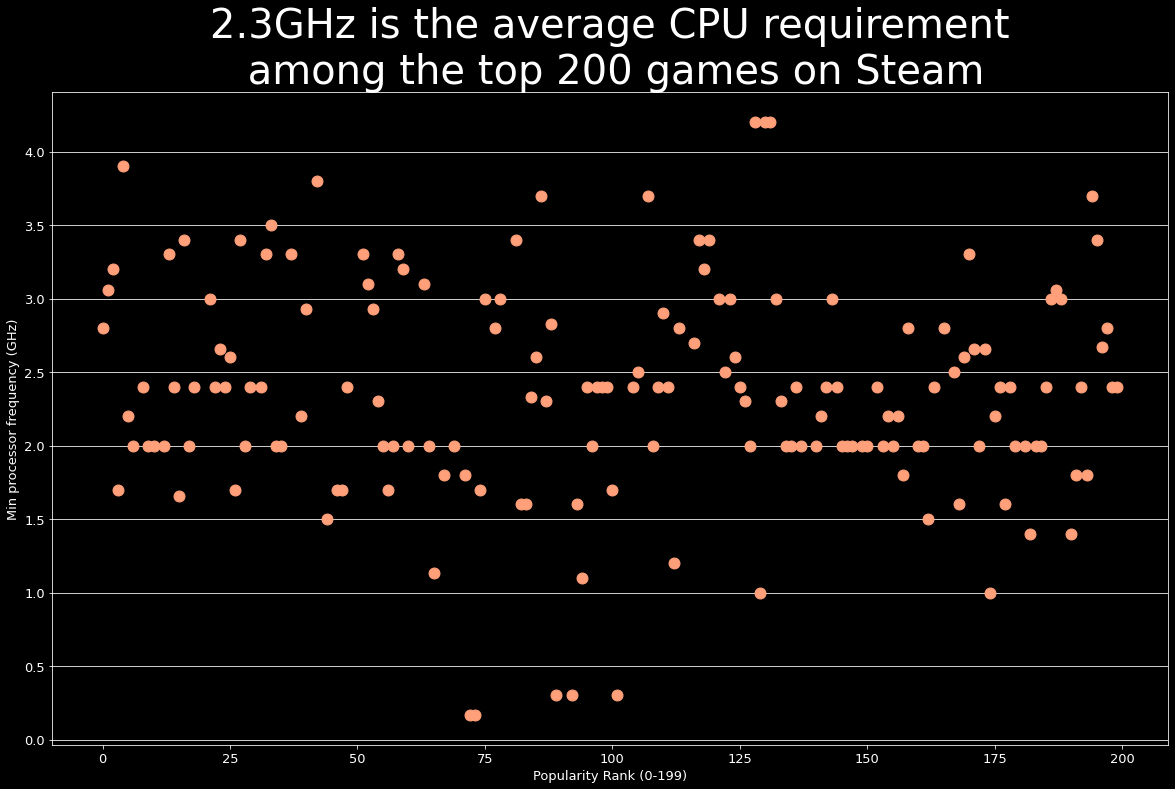

In [64]:
fig, ax = plt.subplots(figsize=(20, 12))
plt.grid(True, axis='y')
ax.set_axisbelow(True) 

# ax.bar(x=pop_games.reset_index(drop=True).index, height=pop_games["min_processor"], color="lightsalmon")
# ax.plot(pop_games["min_processor"].reset_index(drop=True), color="lightsalmon", linewidth=3)
y = pop_games["min_processor"].reset_index(drop=True)
x = range(y.shape[0])
ax.scatter(x=x, y=y, color="lightsalmon", s=120)

plt.title("2.3GHz is the average CPU requirement\n among the top 200 games on Steam", fontsize=40)
plt.yticks(np.arange(0, int(max(pop_games.min_processor)) + 0.5, 0.5))
plt.ylabel("Min processor frequency (GHz)")
plt.xlabel("Popularity Rank (0-199)")

plt.show()

### Progression of minimum memory requirements

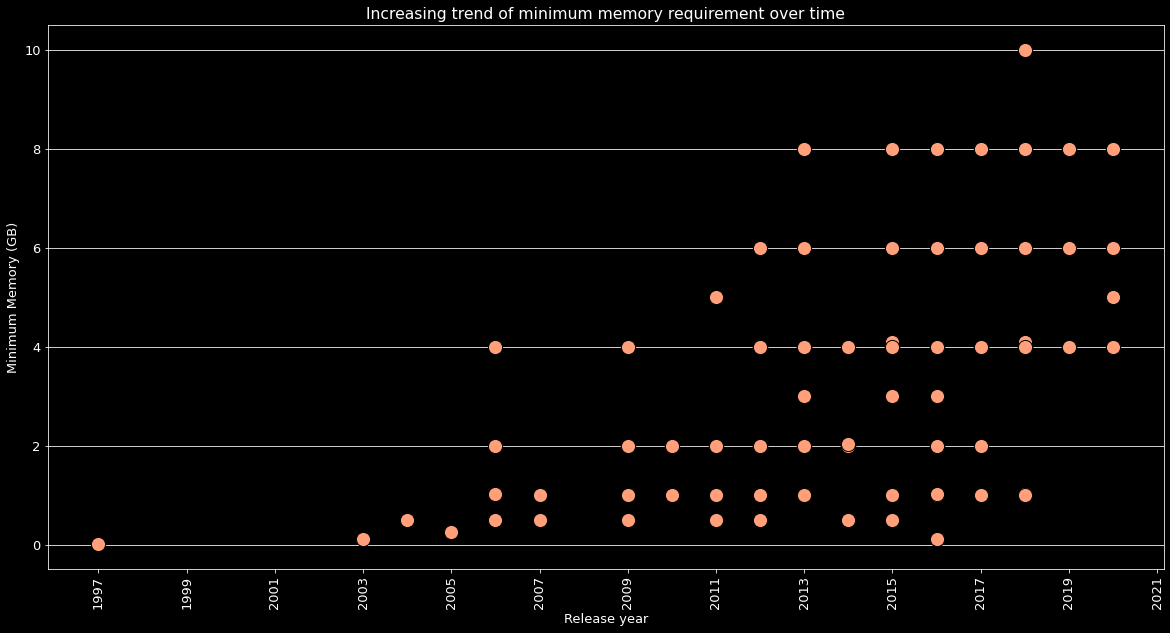

In [29]:
fig, ax = plt.subplots()
plt.grid(True, axis='y')
ax.set_axisbelow(True) 

ax.scatter(preciser_years, pop_games["min_memory"], color="lightsalmon", edgecolor="black", s=200)

plt.xticks(year_range, rotation=90)
plt.title("Increasing trend of minimum memory requirement over time")
plt.xlabel("Release year")
plt.ylabel("Minimum Memory (GB)")
plt.show()

### Distribution of min memory requirements

4.000     55
2.000     33
1.000     20
8.000     19
6.000     13
0.512     12
0.128      4
3.000      4
1.024      3
4.096      2
0.016      2
5.000      2
0.256      1
2.048      1
10.000     1
Name: min_memory, dtype: int64

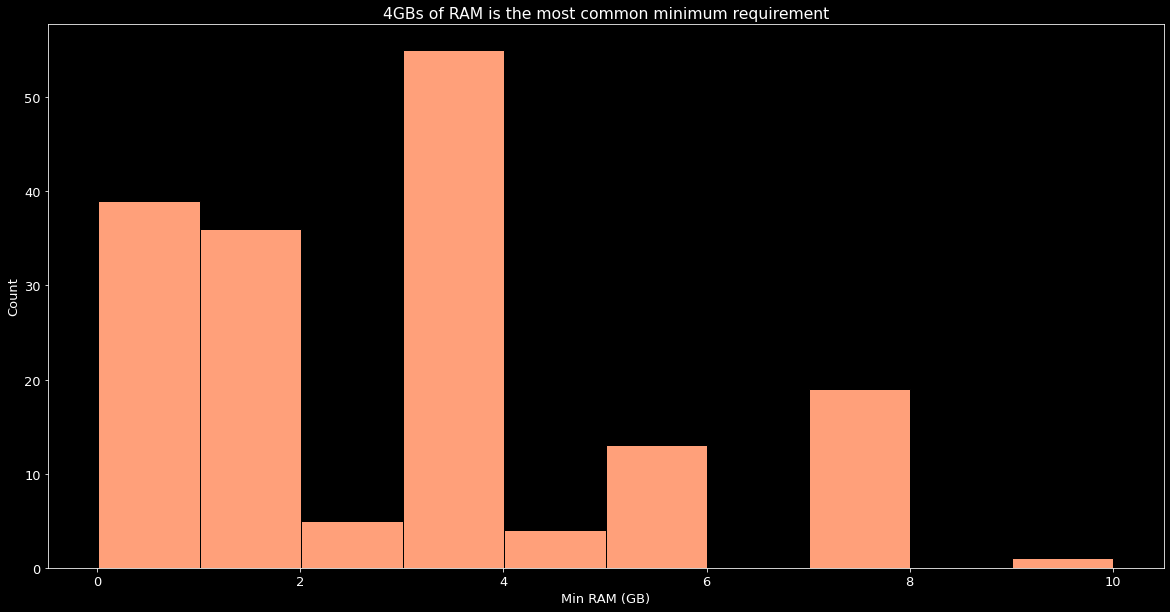

In [65]:
display(pop_games.min_memory.value_counts())
plt.hist(pop_games["min_memory"], color="lightsalmon", edgecolor="black")
plt.title("4GBs of RAM is the most common minimum requirement")
plt.xlabel("Min RAM (GB)")
plt.ylabel("Count")
plt.show()

### Distribution of min storage requirements

count    121.000000
mean      21.126727
std       26.144019
min        0.060000
25%        2.000000
50%       10.000000
75%       30.000000
max      150.000000
Name: min_storage, dtype: float64

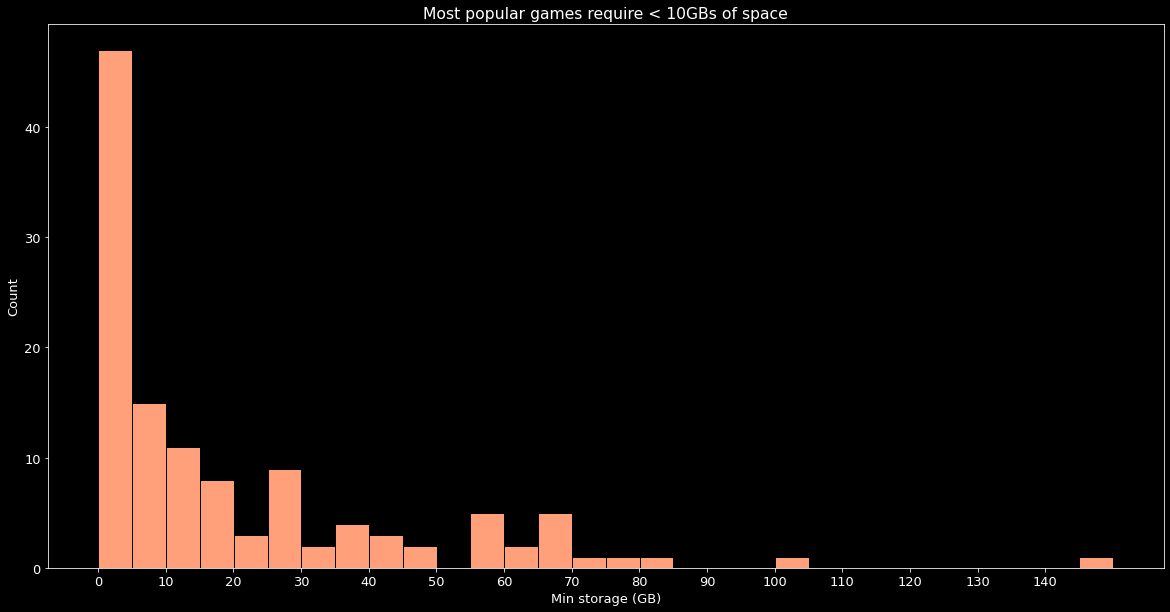

In [31]:
step = 10
storage_range = range(0, int(max(pop_games.min_storage)), step)

display(pop_games.min_storage.describe())

plt.hist(pop_games["min_storage"], color="lightsalmon", edgecolor="black", bins=len(storage_range) * 2)
plt.title("Most popular games require < 10GBs of space")
plt.xticks(storage_range)
plt.xlabel("Min storage (GB)")
plt.ylabel("Count")
plt.show()

findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


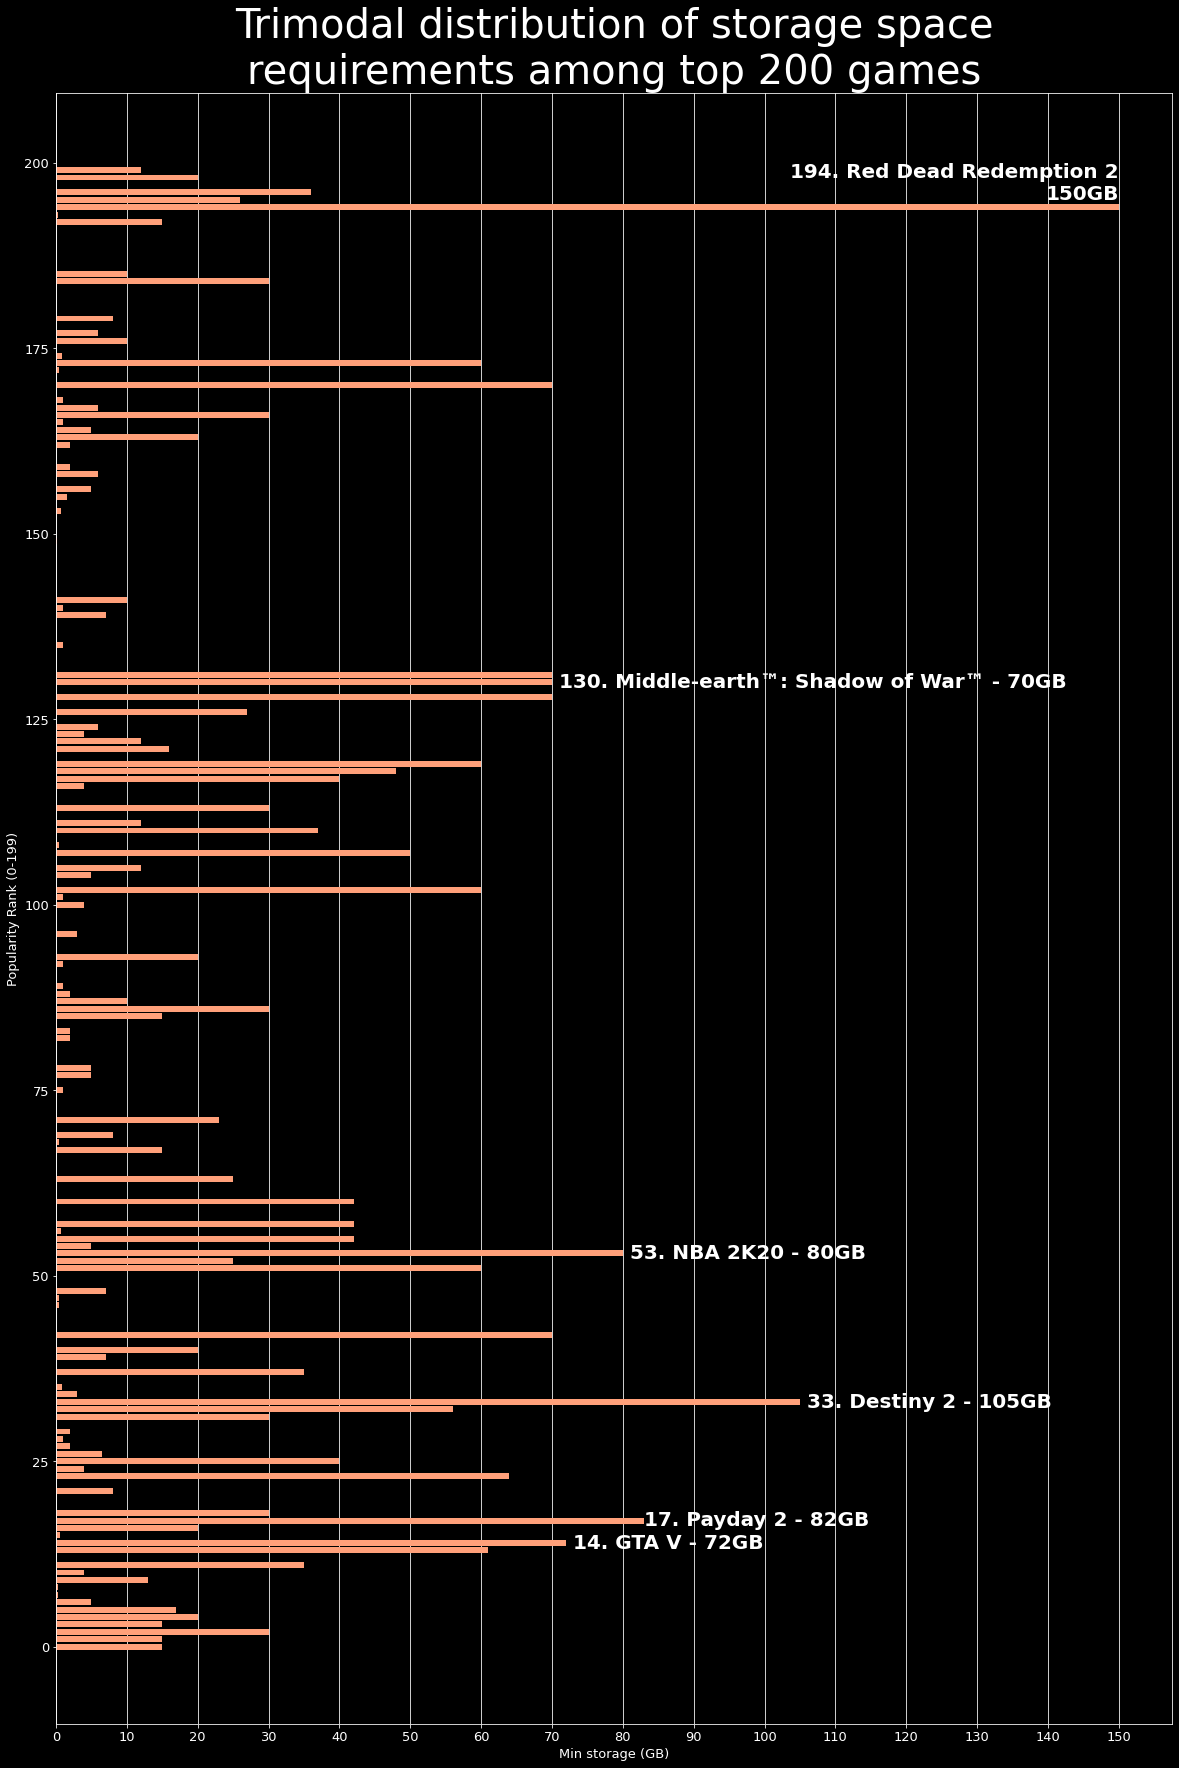

In [32]:
fig, ax = plt.subplots(figsize=(20, 30))
plt.grid(True, axis='x')
ax.set_axisbelow(True) 

ax.barh(pop_games.reset_index(drop=True).index, width=pop_games["min_storage"], color="lightsalmon")

plt.grid(True, axis='x')
plt.title("Trimodal distribution of storage space\nrequirements among top 200 games", fontsize=40)
plt.xticks(range(0, int(max(pop_games.min_storage)) + step, step))
plt.xlabel("Min storage (GB)")
plt.ylabel("Popularity Rank (0-199)")

plt.text(x=150, y=195, s="194. Red Dead Redemption 2\n150GB",
         horizontalalignment="right",
         fontsize=20,
         fontweight="bold")
plt.text(x=71, y=130, s="130. Middle-earth™: Shadow of War™ - 70GB",
         verticalalignment="center",
         fontsize=20,
         fontweight="bold")
plt.text(x=81, y=53, s="53. NBA 2K20 - 80GB",
         verticalalignment="center",
         fontsize=20,
         fontweight="bold")
plt.text(x=106, y=33, s="33. Destiny 2 - 105GB",
         verticalalignment="center",
         fontsize=20,
         fontweight="bold")
plt.text(x=83, y=17, s="17. Payday 2 - 82GB",
         verticalalignment="center",
         fontsize=20,
         fontweight="bold")
plt.text(x=73, y=14, s="14. GTA V - 72GB",
         verticalalignment="center",
         fontsize=20,
         fontweight="bold")

plt.show()